     age            job   marital  education default  balance housing loan  \
0     56   entrepreneur   married    primary      no    44163      no  yes   
1     69   entrepreneur    single  secondary     yes     1765      no  yes   
2     46        student    single    primary     yes    49590     yes  yes   
3     32  self-employed  divorced   tertiary     yes    13950      no  yes   
4     60     management    single   tertiary      no    43270      no  yes   
..   ...            ...       ...        ...     ...      ...     ...  ...   
995   60         admin.    single    unknown     yes     8997     yes  yes   
996   64   entrepreneur    single   tertiary     yes    31489      no  yes   
997   62        student   married    unknown      no     7104      no  yes   
998   35      housemaid   married  secondary     yes    -1130     yes   no   
999   55     technician    single    primary     yes    26684      no  yes   

       contact  day month  duration  campaign  pdays  previous 

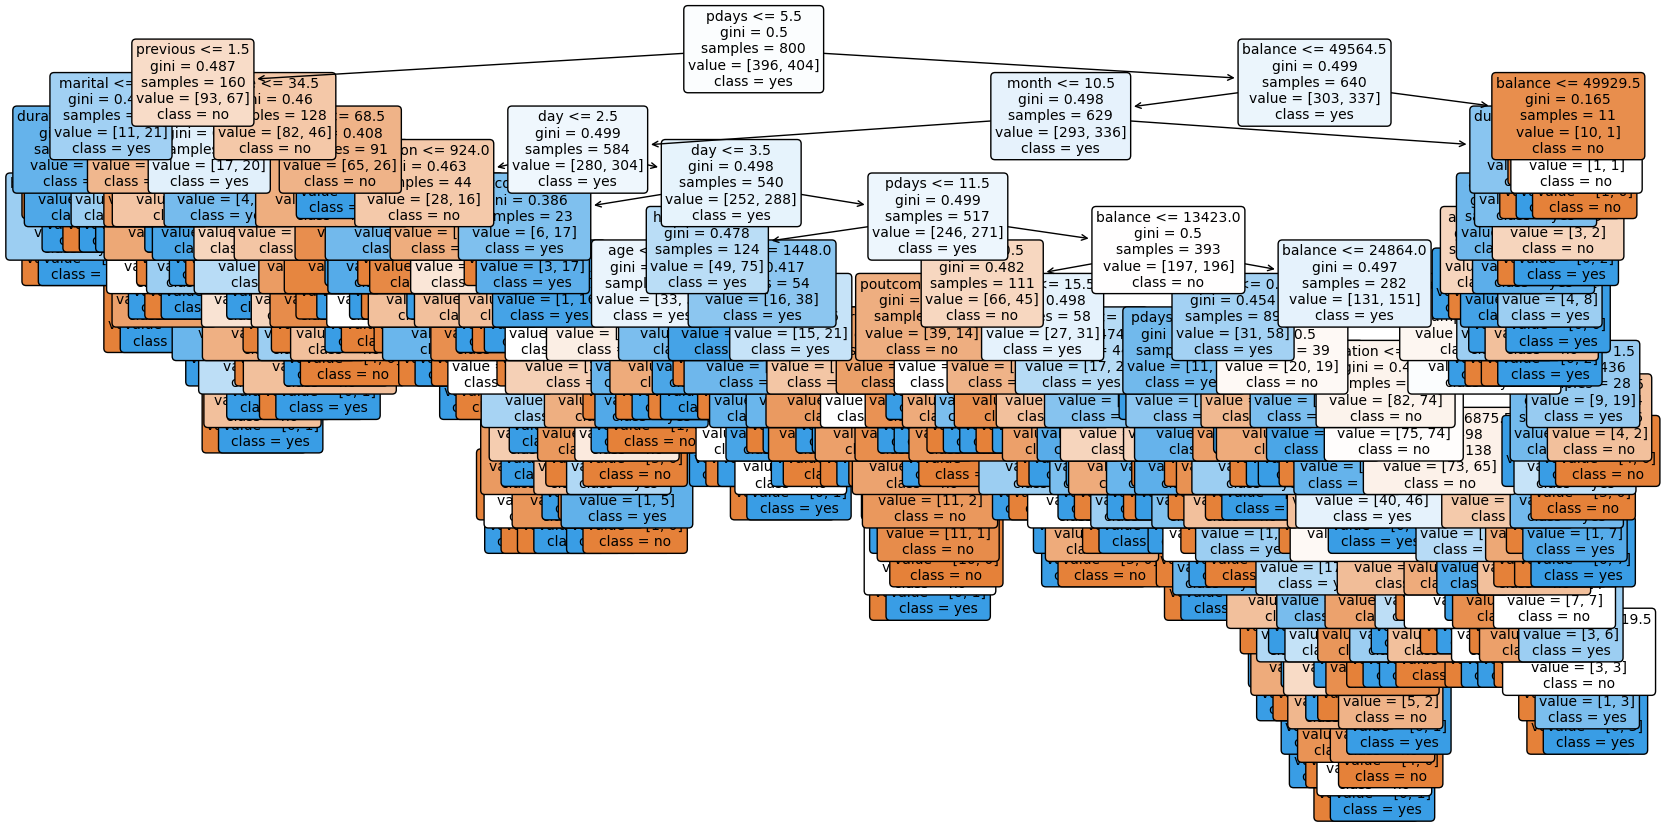

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
data = {
    'age': np.random.randint(18, 70, n_samples),
    'job': np.random.choice(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed'], n_samples),
    'marital': np.random.choice(['married', 'single', 'divorced'], n_samples),
    'education': np.random.choice(['primary', 'secondary', 'tertiary', 'unknown'], n_samples),
    'default': np.random.choice(['yes', 'no'], n_samples),
    'balance': np.random.randint(-2000, 50000, n_samples),
    'housing': np.random.choice(['yes', 'no'], n_samples),
    'loan': np.random.choice(['yes', 'no'], n_samples),
    'contact': np.random.choice(['cellular', 'telephone'], n_samples),
    'day': np.random.randint(1, 31, n_samples),
    'month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], n_samples),
    'duration': np.random.randint(0, 5000, n_samples),
    'campaign': np.random.randint(1, 10, n_samples),
    'pdays': np.random.randint(-1, 30, n_samples),
    'previous': np.random.randint(0, 10, n_samples),
    'poutcome': np.random.choice(['unknown', 'other', 'failure', 'success'], n_samples),
    'y': np.random.choice([0, 1], n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)
print(df)
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['no', 'yes'], rounded=True, fontsize=10)
plt.show()
